# BigQuery using Pandas DataFrames
Taken from [Visualize Jupyter](https://cloud.google.com/bigquery/docs/visualize-jupyter?hl=en)

### Install BigQuery library

In [1]:
pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

Note: you may need to restart the kernel to use updated packages.


### Enable bigquery SQL support and Matplotlib library

In [2]:
%load_ext google.cloud.bigquery
%matplotlib inline

### Import BigQuery python client
[google.cloud.bigquery.client.Client](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.client.Client.html)

In [3]:
from google.cloud import bigquery

client = bigquery.Client()

### Retrieve the annual count of plural births by plurality (2 for twins, 3 for triplets, and so on)

In [4]:
sql = """
SELECT
    plurality,
    COUNT(1) AS count,
    year
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(plurality) AND plurality > 1
GROUP BY
    plurality, year
ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


### Pivot the data and create a stacked bar chart of the count of plural births over time.

<AxesSubplot:xlabel='year'>

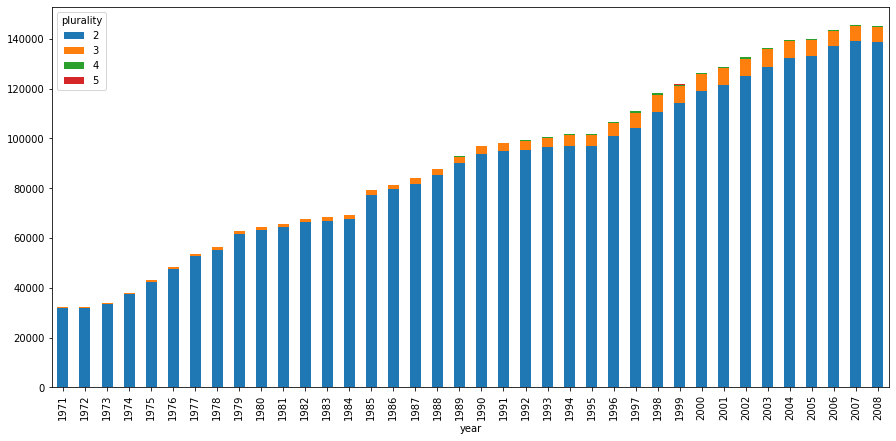

In [5]:
pivot_table = df.pivot(index="year", columns="plurality", values="count")
pivot_table.plot(kind="bar", stacked=True, figsize=(15, 7))

### Retrieve the count of births by the number of gestation weeks

In [6]:
sql = """
SELECT
    gestation_weeks,
    COUNT(1) AS count
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
GROUP BY
    gestation_weeks
ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()

### Plot Count of births by Gestation Weeks
[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

Text(0, 0.5, 'Count')

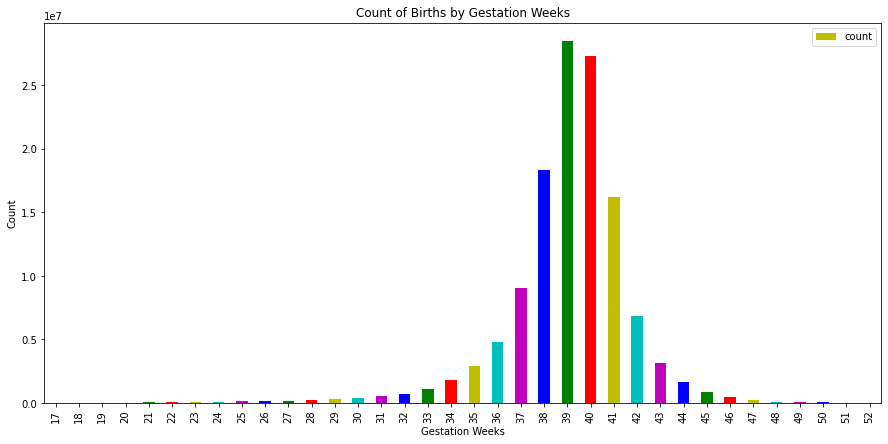

In [7]:
ax = df.plot(kind="bar", x="gestation_weeks", y="count", figsize=(15, 7), color=["y","c","m","b","g","r"])
ax.set_title("Count of Births by Gestation Weeks")
ax.set_xlabel("Gestation Weeks")
ax.set_ylabel("Count")